In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gene_tpm = pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct",skiprows=2)

In [39]:
gene_tpm.count()[0:5]

Name                        56202
Description                 56202
GTEX-1117F-0226-SM-5GZZ7    56202
GTEX-111CU-1826-SM-5GZYN    56202
GTEX-111FC-0226-SM-5N9B8    56202
dtype: int64

In [11]:
samples = pd.read_table("GTEx_v7_Annotations_SampleAttributesDS-blood_lung-ONLY.txt")

In [15]:
samples[1:5]

,SUBJID,SAMPID,SMTS,SMTSD
1,GTEX-111YS,GTEX-111YS-0626-SM-5GZXV,Lung,Lung
2,GTEX-1122O,GTEX-1122O-0005-SM-5O99J,Blood,Whole Blood
3,GTEX-1122O,GTEX-1122O-0126-SM-5GICA,Lung,Lung
4,GTEX-1128S,GTEX-1128S-0005-SM-5P9HI,Blood,Whole Blood


In [16]:
samples[samples.SMTS == "Lung"].SAMPID.values[1:5]
# [["Name", "Description"] + list(samples[samples.SMTS == "Lung"].SAMPID.values)]

array(['GTEX-1122O-0126-SM-5GICA', 'GTEX-1128S-0726-SM-5N9D6',
       'GTEX-117YW-0526-SM-5H11C', 'GTEX-11DXX-0626-SM-5Q5AG'],
      dtype=object)

In [14]:
lung_gene_tpm = gene_tpm[["Name", "Description"] + list(samples[samples.SMTS == "Lung"].SAMPID.values)]
blood_gene_tpm = gene_tpm[["Name", "Description"] + list(samples[samples.SMTS == "Blood"].SAMPID.values)]

In [52]:
blood_gene_tpm.to_csv("blood_gene_tpm.txt",sep= '\t')
lung_gene_tpm.to_csv("lung_gene_tpm.txt",sep= '\t')

In [2]:
blood_gene_tpm = pd.read_table("blood_gene_tpm.txt",index_col=1)
lung_gene_tpm = pd.read_table("lung_gene_tpm.txt", index_col=1)

In [3]:
blood_gene_tpm[1:3]

,Unnamed: 0,Description,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-117YW-0005-SM-5NQ8Z,GTEX-11DXX-0005-SM-5NQ8B,GTEX-11DXZ-0006-SM-5LZZH,GTEX-11EI6-0005-SM-5N9GN,GTEX-11EMC-0006-SM-5O9DN,...,GTEX-ZPIC-0005-SM-4WWEB,GTEX-ZPU1-0006-SM-4WWAT,GTEX-ZQG8-0005-SM-4YCEH,GTEX-ZT9W-0005-SM-4YCEG,GTEX-ZTPG-0006-SM-4YCFG,GTEX-ZTTD-0006-SM-51MSJ,GTEX-ZUA1-0005-SM-4YCEV,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXG5-0005-SM-57WCN
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000227232.4,1,WASH7P,5.24100,7.903,10.6,10.99,5.832,10.65,13.92000,7.528,...,11.34000,11.71,6.442,7.1740,7.228,4.78700,7.02700,5.7890,12.53,12.76000
ENSG00000243485.2,2,MIR1302-11,0.04851,0.000,0.0,0.00,0.000,0.00,0.04025,0.000,...,0.08743,0.00,0.000,0.0458,0.000,0.03926,0.04641,0.1059,0.00,0.05367


In [5]:
lung_gene_tpm['Description'].value_counts()[1:5]

snoU13      457
U3           80
SNORD112     48
SNORA70      30
Name: Description, dtype: int64

In [9]:
# for lung_gene_tpm
lung_gene_tpm.iloc[0:2,0:3].transpose()

Name,ENSG00000223972.4,ENSG00000227232.4
Unnamed: 0,0,1
Description,DDX11L1,WASH7P
GTEX-111YS-0626-SM-5GZXV,0.02705,6.074


In [6]:
lung_gene_tpm.shape

(56202, 273)

lung and blood transpose

In [8]:
gene_count = lung_gene_tpm.shape[0] # also equal to 
step = 1000
i,j = 0,0

lung_gene_tpm_T = pd.DataFrame(index=lung_gene_tpm.columns[2:]) # empty df
blood_gene_tpm_T = pd.DataFrame(index=blood_gene_tpm.columns[2:]) # empty df

while i < gene_count:
    j = i + step
    if j > gene_count: j = gene_count
    batch = lung_gene_tpm.iloc[i:j,2:].transpose()
    lung_gene_tpm_T = pd.concat([lung_gene_tpm_T, batch], axis= 1)
    batch = blood_gene_tpm.iloc[i:j,2:].transpose()
    blood_gene_tpm_T = pd.concat([blood_gene_tpm_T, batch], axis= 1)
    i=j
lung_gene_tpm_T.shape, blood_gene_tpm_T.shape

((271, 56202), (271, 56202))

转置后：样本为行，基因为列

In [11]:
# blood_gene_tpm_T.describe() #don't run , will take 5 minutes 

,ENSG00000223972.4,ENSG00000227232.4,ENSG00000243485.2,ENSG00000237613.2,ENSG00000268020.2,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.2,ENSG00000233750.3,ENSG00000237683.5,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.195706,9.296273,0.040774,0.028696,0.016297,0.021055,0.024973,0.328771,1.641614,259.878487,...,5070.130258,0.403311,0.279224,0.361063,925.425830,1373.807749,6.001719,2882.659410,0.348269,0.367815
std,0.241658,4.646053,0.068898,0.033836,0.028784,0.035113,0.041384,0.436469,1.790907,208.994881,...,3217.567757,0.712209,0.589935,0.561660,635.381011,1094.192810,7.070258,1843.887713,0.581781,0.575854
min,0.000000,1.223000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015680,17.240000,...,577.900000,0.000000,0.000000,0.000000,118.400000,136.300000,0.000000,388.100000,0.000000,0.000000
25%,0.054135,5.972000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068155,0.409900,112.150000,...,2785.000000,0.000000,0.000000,0.000000,503.800000,651.750000,2.055000,1694.500000,0.000000,0.000000
50%,0.117500,8.137000,0.000000,0.026080,0.000000,0.000000,0.000000,0.165800,1.154000,218.100000,...,4281.000000,0.000000,0.000000,0.000000,771.600000,1137.000000,4.046000,2380.000000,0.000000,0.000000
75%,0.263550,11.760000,0.056140,0.043050,0.032735,0.035630,0.042400,0.415400,2.228000,335.050000,...,6560.000000,0.605600,0.482000,0.634150,1146.500000,1667.000000,6.938000,3655.500000,0.589000,0.588750
max,2.008000,28.980000,0.650200,0.213800,0.163000,0.282700,0.274400,2.671000,14.440000,1668.000000,...,23420.000000,7.237000,4.151000,3.933000,5614.000000,10510.000000,46.480000,14560.000000,3.627000,3.050000


有没有那些基因是在所有血液样本中都有表达呢？ 答：NO

In [9]:
# np.corrcoef(blood_gene_tpm_T[1],blood_gene_tpm_T[1])
blood_gene_tpm_T.all(axis="columns").value_counts()

False    271
dtype: int64

比较血液中两个基因的表达趋势是否相关，以坐标或列名任选两列,简单测试

In [241]:
np.corrcoef(blood_gene_tpm_T.iloc[:,0],blood_gene_tpm_T.iloc[:,2])[0,1] ,
np.corrcoef(blood_gene_tpm_T['ENSG00000223972.4'],blood_gene_tpm_T['ENSG00000243485.2'])[0,1]

0.07217001923441435

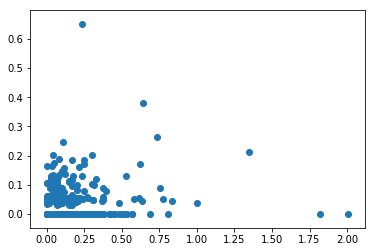

In [10]:
plt.scatter(blood_gene_tpm_T.iloc[:,0],blood_gene_tpm_T.iloc[:,2])

In [282]:
np.corrcoef(blood_gene_tpm_T.iloc[:,1],lung_gene_tpm_T.iloc[:,1])[0,1]
# np.corrcoef(blood_gene_tpm.iloc[1,2:].astype(float),lung_gene_tpm.iloc[1,2:].astype(float)) 
# blood_gene_tpm_T[1].corr(blood_gene_tpm_T[1])

0.3334296542738806

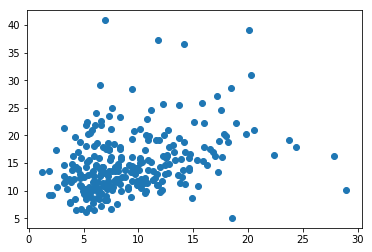

In [11]:
plt.scatter(blood_gene_tpm_T.iloc[:,1], lung_gene_tpm_T.iloc[:,1])

写个loop: coorelation coefficient between blood基因 and lung基因（不需要一定是同一个基因）

In [12]:
top_corr_gene_count = 10
# np.zeros(shape=(gene_count,gene_count), dtype=np.int) # TOO large -> MemoryError
# lung_blood_corr = np.zeros(shape=(top_corr_gene_count,gene_count), dtype=np.str) 
lung_blood_corr = pd.DataFrame(data=0,index= range(0,top_corr_gene_count), columns=lung_gene_tpm_T.columns)

corr_values = pd.Series(data=np.random.normal(size=gene_count), index= blood_gene_tpm_T.columns,dtype=np.float)

lung_blood_corr['ENSG00000223972.4'] = corr_values.abs().sort_values().tail(10).index
lung_blood_corr

,ENSG00000223972.4,ENSG00000227232.4,ENSG00000243485.2,ENSG00000237613.2,ENSG00000268020.2,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.2,ENSG00000233750.3,ENSG00000237683.5,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
0,ENSG00000186998.11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENSG00000226115.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSG00000186743.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ENSG00000259799.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSG00000260574.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ENSG00000228195.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ENSG00000226557.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ENSG00000235511.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ENSG00000235587.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,ENSG00000183520.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for lung_gene in lung_gene_tpm_T.columns:
    lung_blood_corr[lung_gene] = 3
    # make a temp vector
    # corr_values = np.zeros(shape=(gene_count), dtype=np.int)
    
    corr_values = pd.Series(data=0, 
                            index= blood_gene_tpm_T.columns,
                            dtype=np.float)
    
    for blood_gene in blood_gene_tpm_T.columns:
        corr_values[blood_gene] = np.corrcoef(blood_gene_tpm_T[blood_gene],lung_gene_tpm_T[lung_gene])[0,1]
    lung_blood_corr[lung_gene] = corr_values.abs().sort_values().tail(top_corr_gene_count).index


C:\Users\xwj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\xwj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [24]:
lung_blood_corr.iloc[:,0:10]

0.1920947319524508

python里的corr函数也能算corelation coefficent，不方便

count    325.000000
mean       0.160123
std        0.172534
min        0.000000
20%        0.023805
40%        0.058616
50%        0.099530
60%        0.146740
80%        0.286888
90%        0.416680
max        0.844252
dtype: float64

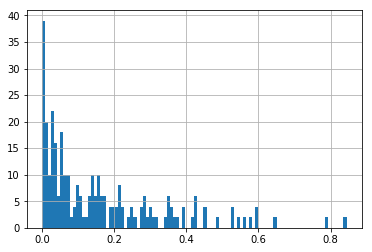

In [288]:
temp = lung_gene_tpm.iloc[1:20,2:].transpose().corr().abs()
np.fill_diagonal(temp.values, 0)
temp.stack().hist(bins=100)
temp.stack().describe(percentiles = [0.2,0.4,0.5,0.6,0.8,0.9])
# temp = np.corrcoef(blood_gene_tpm_T.iloc[:,1:5],rowvar=False)

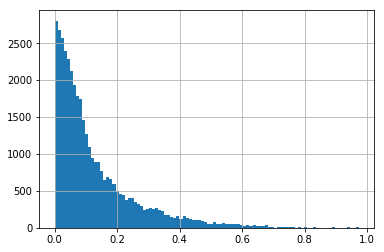

count    38416.000000
mean         0.132410
std          0.146716
min          0.000046
20%          0.028618
40%          0.061711
50%          0.082438
60%          0.108742
80%          0.208425
90%          0.319447
max          1.000000
dtype: float64